In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [4]:
churn_data = churn_data.drop('RowNumber', axis=1)

In [5]:
churn_data = churn_data.copy()
churn_data['Exited by percent'] = churn_data['Exited'].value_counts()/churn_data['Exited'].shape[0]*100
fig = px.histogram(
    data_frame=churn_data,
    x = 'Exited',
    y = 'Exited by percent',
    title = 'Соотношение ушедших и лояльных клиентов',    
    color='Exited',
    width = 1000,    
)
fig.show()
fig.write_html('plotly/Exited.html')

Соотношение лояльных клиентов и ушедших клиентов - 79.63% к 20.37%. То есть ушло почти в четыре раза меньше клиентов, чем осталось. Ушло более 20 % клиентов банка

 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [6]:
fig = px.histogram(
    data_frame=churn_data['Balance'],
    x = 'Balance',   
    title = 'Распределение баланса пользователей, на счету которых более 2500 долларов',    
    histnorm = 'percent',
    width = 1200,
    height = 700,
    marginal = 'box',  
)
fig.show()
fig.write_html('plotly/Balance.html')

Из графика можно сделать вывод, что больше 2500 долларов на счету у 63.83% кклиентов. В среднем на счетах около 112500-117500 долларов. Но есть и счет на  почти 251 тысячу долларов. В целом распределение нормальное.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [7]:
fig = px.histogram(
    data_frame=churn_data,
    x = 'Balance',
    y = 'Exited',  
    title = 'Распределение баланса клиентов по оттоку',
    color='Exited',
    width = 1200,
    height = 700,
    marginal = 'box',  
)
fig.show()
fig.write_html('plotly/Balance_Exited.html')

У ушедших клиентов суммы на счетах больше, чем у лояльных. Все значения больше (минимальная, медиана, максимальная). Уходят более состоятельные клиенты. Возможно, это связано с процентной ставкой накопительных счетов. Если у клиента большая сумма на счете, а процент маленький, то он имеет маленький доход и ему это не выгодно. Для людей с небольшими вкладами это не имеет большого значения.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [8]:

fig = px.box(
    data_frame=churn_data,
    x = 'Age',
    y = 'Exited',
    
    color='Exited',
    orientation='h',
    title='Распределение возраста по оттоку клиентов'
)
fig.show()
fig.write_html('plotly/Age_Exited.html')

Потенциальных выбросов больше в группе лояльных клиентов. Стоит обратить внимание на клиентов старшего возраста, потому что клиенты старшего возраста уходят из банка чаще

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

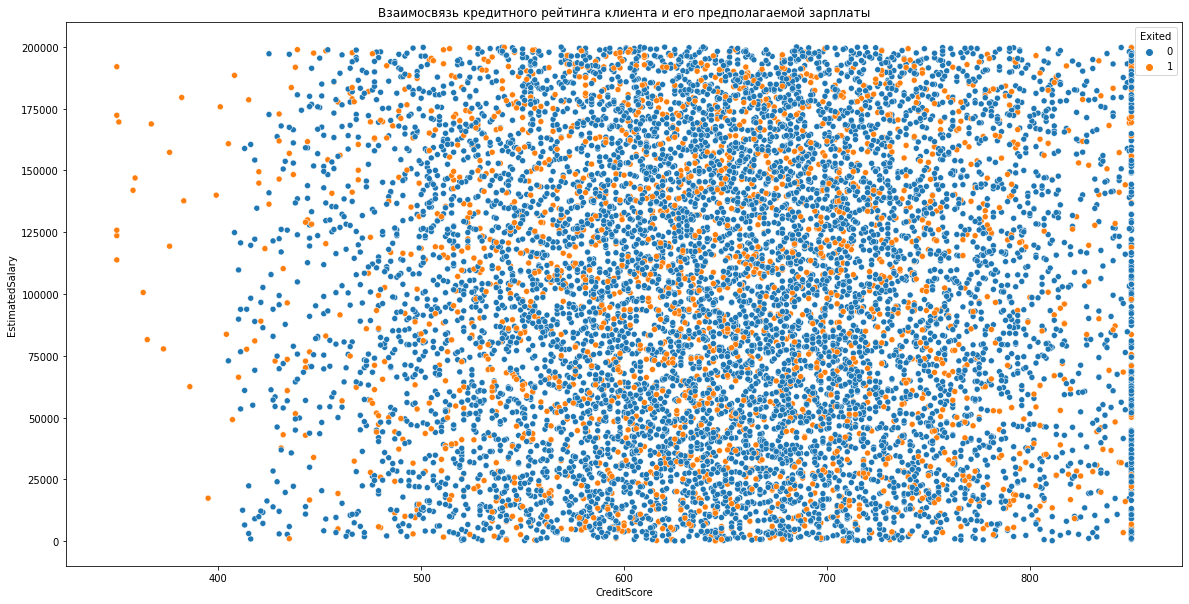

In [9]:
fig = plt.figure(figsize=(20, 10))
scatter_data = churn_data
ax = sns.scatterplot(
    data=scatter_data, 
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',    
)
ax.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
fig.savefig('plotly/CreditScore_EstimatedSalary.pdf')

Взаимосвязи нет. Признаки между собой не связаны. Можно понять, что самые маленькие кредитные рейтинги только у ушедших клиентов. И основная масса клиентов имеют рейтинг примерно от 550 до 750. 

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [10]:
bar_data = churn_data.groupby(
    ['Gender'],
    as_index=False
)['Exited'].mean()
fig = px.bar(
    data_frame=bar_data,
    x='Exited',
    y='Gender',
    barmode="group",
    color='Exited',
    orientation='h',
    title='Соотношение лояльности клиентов и их пола'
)
fig.show()
fig.write_html("plotly/Exited_Gender.html")

Из графика можно сделать вывод, что женщины уходят из банка чаще, чем мужчины. Из всех клиентов банка, процент ушедших женщин составляет 25.07%, а мужчин 16.46%.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

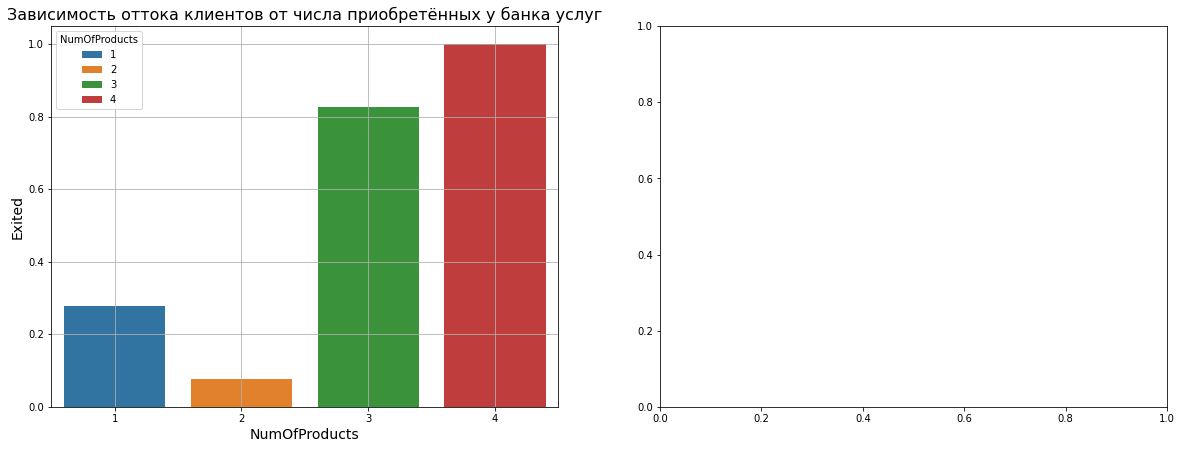

In [11]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
barplot = sns.barplot(
    data = churn_data,
    x = 'NumOfProducts',
    y = 'Exited',
    hue = 'NumOfProducts',
    orient = 'v',
    ax = axes[0],
    ci = None,
    dodge = False,   
)
barplot.set_title('Зависимость оттока клиентов от числа приобретённых у банка услуг', fontsize=16)
barplot.set_xlabel('NumOfProducts', fontsize=14)
barplot.set_ylabel('Exited', fontsize=14)
barplot.grid()
fig.savefig('plotly/NumOfProducts_Exited.pdf')

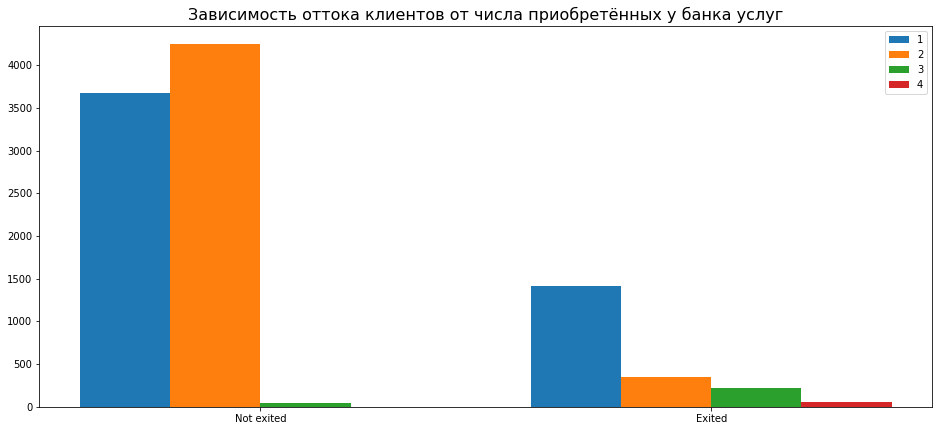

In [12]:
cat_par = ['Not exited', 'Exited']
g1 = [churn_data[(churn_data['NumOfProducts'] == 1) & (churn_data['Exited'] == 0)]['Exited'].shape[0],
 churn_data[(churn_data['NumOfProducts'] == 1) & (churn_data['Exited'] == 1)]['Exited'].shape[0], ]
g2 = [churn_data[(churn_data['NumOfProducts'] == 2) & (churn_data['Exited'] == 0)]['Exited'].shape[0],
 churn_data[(churn_data['NumOfProducts'] == 2) & (churn_data['Exited'] == 1)]['Exited'].shape[0], ]
g3 = [churn_data[(churn_data['NumOfProducts'] == 3) & (churn_data['Exited'] == 0)]['Exited'].shape[0],
 churn_data[(churn_data['NumOfProducts'] == 3) & (churn_data['Exited'] == 1)]['Exited'].shape[0], ]
g4 = [churn_data[(churn_data['NumOfProducts'] == 4) & (churn_data['Exited'] == 0)]['Exited'].shape[0],
 churn_data[(churn_data['NumOfProducts'] == 4) & (churn_data['Exited'] == 1)]['Exited'].shape[0], ]
width = 0.8
x = np.arange(len(cat_par))
fig, ax = plt.subplots(figsize=(16, 7))
rects1 = ax.bar(x - 3*width/8, g1, width/4, label='1')
rects2 = ax.bar(x - width/8, g2, width/4, label='2')
rects3 = ax.bar(x + width/8, g3, width/4, label='3')
rects4 = ax.bar(x + 3*width/8, g4, width/4, label='4')
ax.set_title('Зависимость оттока клиентов от числа приобретённых у банка услуг', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()
fig.savefig('plotly/Exited_NumOfProducts.pdf')

Можно сделать вывод, что лояльные клиенты приобретали 1 и 2 услуги банка, 3-очень мало, а 4 не приобретали совсем, а ушедшие чаще всего пользовались 1 услугой. Но пользовались услугами банка гораздо меньше, чем лояльные клиенты.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [13]:
bar_data = churn_data.groupby(
    ['IsActiveMember'],
    as_index=False
)['Exited'].mean()
fig = px.bar(
    data_frame=bar_data,
    x='Exited',
    y='IsActiveMember',
    barmode="group",
    color='Exited',
    orientation='h',
    title='Влияние статуса активного клиента на отток клиента'
)
fig.show()
fig.write_html("plotly/Exited_IsActiveMember.html")

Активные клиенты более лояльно относятся к банку. Можно предложить неактивным клиентам дополнительные услуги, например, кредитные карты с низкими процентами или льготными периодами. Провести рекламную кампанию банка.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [14]:
churn_data.groupby('Geography')['Exited'].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

In [15]:
F = churn_data[(churn_data['Geography'] == 'France') & churn_data['Exited'] == 1].shape[0]/churn_data['Exited'].shape[0]
G = churn_data[(churn_data['Geography'] == 'Germany') & churn_data['Exited'] == 1].shape[0]/churn_data['Exited'].shape[0]
S = churn_data[(churn_data['Geography'] == 'Spain') & churn_data['Exited'] == 1].shape[0]/churn_data['Exited'].shape[0]
F, G, S

(0.081, 0.0814, 0.0413)

In [16]:
countries = pd.Series(
    data = [F, G, S],
    index = ['France', 'Germany', 'Spain'],
)
countries

France     0.0810
Germany    0.0814
Spain      0.0413
dtype: float64

In [17]:
data_country = pd.DataFrame(
    data=[[F, G, S]],
    columns=['France', 'Germany', 'Spain']
)
data_country

,France,Germany,Spain
0,0.081,0.0814,0.0413


In [18]:
concat_data = pd.concat([churn_data, data_country])
concat_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited by percent,France,Germany,Spain
0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,79.63,NaN,NaN,NaN
1,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,20.37,NaN,NaN,NaN
2,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,NaN,NaN,NaN,NaN
3,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,NaN,NaN,NaN,NaN
4,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15569892.0,Johnstone,516.0,France,Male,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0,NaN,NaN,NaN,NaN
9997,15584532.0,Liu,709.0,France,Female,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0,NaN,NaN,NaN,NaN
9998,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0,NaN,NaN,NaN,NaN
9999,15628319.0,Walker,792.0,France,Female,28.0,4.0,130142.79,1.0,1.0,0.0,38190.78,0.0,NaN,NaN,NaN,NaN


In [24]:

fig = px.choropleth(
    data_frame=concat_data, #DataFrame
    locations='Geography', #столбец с локациями
    locationmode = 'country names', #режим сопоставления локаций с базой Plotly
    color='Exited', #от чего зависит цвет
    animation_frame='Exited', #анимационный бегунок
    range_color=[0, 1], #диапазон цвета
    title='Лояльность клиентов по странам', #заголовок
    width=1200, #ширина
    height=800, #высота
    color_continuous_scale='Greens' #палитра цветов
)
fig.show()
fig.write_html("plotly/Exited_Geography.html")

In [25]:
France = churn_data[(churn_data['Geography'] == 'France') & churn_data['Exited'] == 1].shape[0]
Germany = churn_data[(churn_data['Geography'] == 'Germany') & churn_data['Exited'] == 1].shape[0]
Spain = churn_data[(churn_data['Geography'] == 'Spain') & churn_data['Exited'] == 1].shape[0]
France, Germany, Spain

(810, 814, 413)

In [27]:
country_data = pd.DataFrame(
    data = {'Country': ['France', 'Germany', 'Spain'], 'Count': [France, Germany, Spain]}
)
country_data

,Country,Count
0,France,810
1,Germany,814
2,Spain,413


In [34]:

fig = px.choropleth(
    data_frame=country_data, #DataFrame
    locations='Country', #столбец с локациями
    locationmode = 'country names', #режим сопоставления локаций с базой Plotly
    color='Count', #от чего зависит цвет
    animation_frame='Count', #анимационный бегунок
    range_color=[0, 1000], #диапазон цвета
    title='Лояльность клиентов по странам', #заголовок
    width=1200, #ширина
    height=800, #высота
    color_continuous_scale='Greens' #палитра цветов
)
fig.show()

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [20]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)
pivot.columns = pivot.columns.astype('string')
pivot  


Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


Text(0.5, 1.0, 'Тепловая карта оттока клиентов')

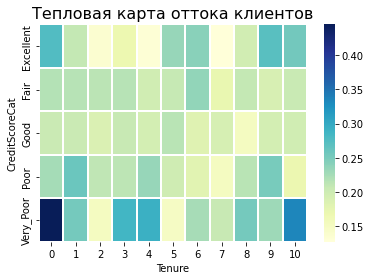

In [21]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu', linewidths=2)
heatmap.set_title('Тепловая карта оттока клиентов', fontsize=16)

Чаще всего уходят клиенты категории Very_Poor(очень бедные) с рейтингом от 300 до 499. Причем они уходят больше всего в первый год и на 10 год. 